In [8]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model

class ConvolutionalAutoencoder:
    def __init__(self):
        self.encoder_model = None
        self.model = None
        return
    
    def build(self, input_dims, encoding_dim):
        input_layer = Input(shape=input_dims)
        
        conv_one = Conv2D(16, (3,3), activation='relu', padding='same') (input_layer)
        pool_one = MaxPooling2D((2,2), padding='same') (conv_one)
        conv_two = Conv2D(8, (3,3), activation='relu', padding='same') (pool_one)
        pool_two = MaxPooling2D((2,2), padding='same') (conv_two)
        conv_three = Conv2D(8, (3,3), activation='relu', padding='same') (pool_two)
        encoder_output = MaxPooling2D((2,2), padding='same') (conv_three)
        self.encoder_model = Model(input_layer, encoder_output)
        
        conv_four = Conv2D(8, (3,3), activation='relu', padding='same') (encoder_output)
        upsamp_one = UpSampling2D((2,2)) (conv_four)
        conv_five = Conv2D(8, (3,3), activation='relu', padding='same') (upsamp_one)
        upsamp_two = UpSampling2D((2,2)) (conv_five)
        conv_six = Conv2D(16, (3,3), activation='relu') (upsamp_two)
        upsamp_three = UpSampling2D((2,2)) (conv_six)
        decoder_output = Conv2D(1, (3,3), activation='sigmoid', padding='same') (upsamp_three)
        self.model = Model(input_layer, decoder_output)
        
        self.model.compile(optimizer='adagrad', loss='binary_crossentropy')
        return
    
    def load(self, model_file, encoder_model_file):
        self.encoder_model = load_model(encoder_model_file)
        self.model = load_model(model_file)
        return
    
    def train(self, train_input, train_output,
             val_input, val_output,
             epochs=50,
             batch_size=256,
             shuffle=True):
        self.model.fit(train_input, train_output,
                      epochs=epochs, batch_size=batch_size,
                      shuffle=shuffle,
                      validation_data=(val_input, val_output))
        return
    
    def encoder_predict(self, test_input):
        return self.encoder_model.predict(test_input)
    
    def predict(self, test_input):
        return self.model.predict(test_input)
    
    def save(self, model_file, encoder_model_file):
        self.model.save(model_file)
        self.encoder_model.save(encoder_model_file)
        return

In [9]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print x_train.shape
print x_test.shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
autoencoder = ConvolutionalAutoencoder()
autoencoder.build((28, 28, 1, ), 32)

In [12]:
autoencoder.train(x_train, x_train, x_test, x_test,
                 epochs=50,
                 batch_size=256,
                 shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 26s - loss: 0.2233 - val_loss: 0.1799
Epoch 2/50
60000/60000 [==============================] - 22s - loss: 0.1716 - val_loss: 0.1646
Epoch 3/50
60000/60000 [==============================] - 21s - loss: 0.1594 - val_loss: 0.1551
Epoch 4/50
60000/60000 [==============================] - 20s - loss: 0.1520 - val_loss: 0.1500
Epoch 5/50
60000/60000 [==============================] - 20s - loss: 0.1466 - val_loss: 0.1423
Epoch 6/50
60000/60000 [==============================] - 20s - loss: 0.1423 - val_loss: 0.1389
Epoch 7/50
60000/60000 [==============================] - 20s - loss: 0.1391 - val_loss: 0.1374
Epoch 8/50
60000/60000 [==============================] - 20s - loss: 0.1365 - val_loss: 0.1337
Epoch 9/50
60000/60000 [==============================] - 21s - loss: 0.1345 - val_loss: 0.1333
Epoch 10/50
60000/60000 [==============================] - 20s - loss: 0.1328 - val_lo

In [13]:
pred_train = autoencoder.predict(x_test)

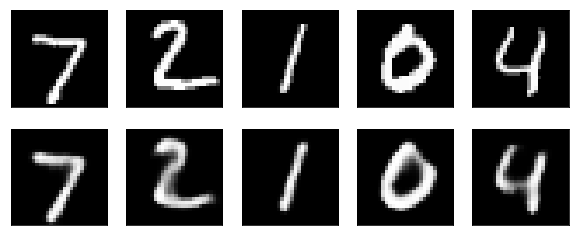

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(pred_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [15]:
autoencoder.model.save('conv-autoencoder-model.h5')
autoencoder.encoder_model.save('conv-autoencoder-encoder-model.h5')
print "Saved!"

Saved!
